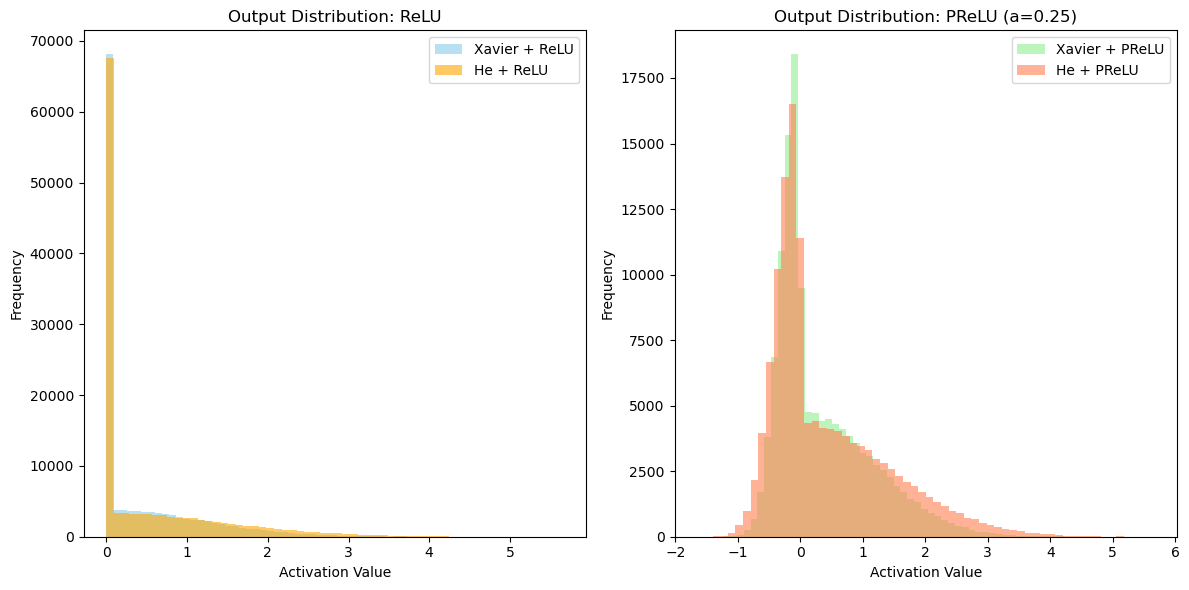

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Layer size
n_in, n_out = 256, 128

# Generate random input data (e.g., batch of 1000 samples, input dimension = n_in)
np.random.seed(42)
input_data = np.random.randn(1000, n_in)

# Xavier Initialization
xavier_std = np.sqrt(2 / (n_in + n_out))
xavier_weights = np.random.normal(0, xavier_std, (n_in, n_out))

# He Initialization
he_std = np.sqrt(2 / n_in)
he_weights = np.random.normal(0, he_std, (n_in, n_out))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def prelu(x, a=0.25):
    return np.where(x > 0, x, a * x)

# Outputs after layer + activation
def get_activations(input_data, weights, activation_fn):
    linear_output = input_data @ weights  # simulates layer output
    return activation_fn(linear_output)

# Compute activations
acts_xavier_relu = get_activations(input_data, xavier_weights, relu)
acts_he_relu = get_activations(input_data, he_weights, relu)

acts_xavier_prelu = get_activations(input_data, xavier_weights, lambda x: prelu(x, a=0.25))
acts_he_prelu = get_activations(input_data, he_weights, lambda x: prelu(x, a=0.25))

# Plot output distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(acts_xavier_relu.flatten(), bins=60, alpha=0.6, label='Xavier + ReLU', color='skyblue')
plt.hist(acts_he_relu.flatten(), bins=60, alpha=0.6, label='He + ReLU', color='orange')
plt.title("Output Distribution: ReLU")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(acts_xavier_prelu.flatten(), bins=60, alpha=0.6, label='Xavier + PReLU', color='lightgreen')
plt.hist(acts_he_prelu.flatten(), bins=60, alpha=0.6, label='He + PReLU', color='coral')
plt.title("Output Distribution: PReLU (a=0.25)")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


1.   ### Allowing parametric learning at initialisation as shown by the above might led to earlier convergence for deeper models the model learns early and might benefir from learning when x is equal to or less than zero. 

In [4]:
# Layer size
n_in, n_out = 256, 128

# Generate random input data (e.g., batch of 1000 samples, input dimension = n_in)
np.random.seed(42)
input_data = np.random.randn(1000, n_in)

# Xavier Initialization
xavier_std = np.sqrt(2 / (n_in + n_out))
xavier_weights = np.random.normal(0, xavier_std, (n_in, n_out))

# He Initialization
he_std = np.sqrt(2 / n_in)
he_weights = np.random.normal(0, he_std, (n_in, n_out))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def prelu(x, a=0.25):
    return np.where(x > 0, x, a * x)

# Outputs after layer + activation
def get_activations(input_data, weights, activation_fn):
    linear_output = input_data @ weights  # simulates layer output
    return activation_fn(linear_output)
# Compute activations
acts_xavier = get_activations(input_data, xavier_weights, activation_fn=relu)
acts_he_prelu1 = get_activations(input_data, he_weights, lambda x: prelu(x, a=0.25))

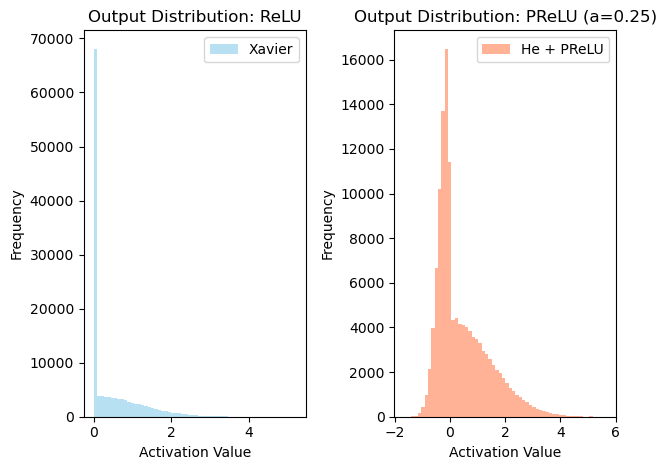

In [5]:
plt.subplot(1, 2, 1)
plt.hist(acts_xavier.flatten(), bins=60, alpha=0.6, label='Xavier', color='skyblue')
plt.title("Output Distribution: ReLU")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(acts_he_prelu1.flatten(), bins=60, alpha=0.6, label='He + PReLU', color='coral')
plt.title("Output Distribution: PReLU (a=0.25)")
plt.xlabel("Activation Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

2.   ### The above illustration shows that He + PReLU is likely to influence early convergence of the training and neural networks and in particular for deeper models.